In [1]:
# 3-2
def step_function(x):
    if (x > 0):
        return 1
    else:
        return 0

In [2]:
import numpy as np
# x: np array
def step_function(x):
    # 配列にたいして比較演算すると各要素に対する比較演算の結果のbooleanからなる配列を返す
    y = x > 0
    # booleanを0, 1にする
    return y.astype(np.int)

In [4]:
x = np.array([-1, 1, 2])
step_function(x)

array([0, 1, 1])

In [5]:
import matplotlib.pylab as plt

In [6]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)

(-0.1, 1.1)

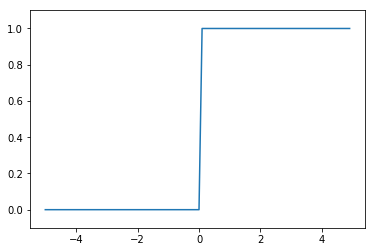

In [9]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y軸の範囲指定

In [15]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

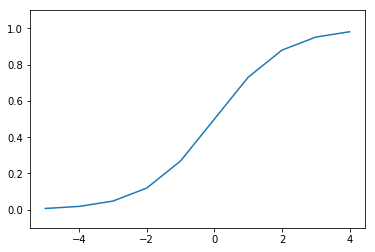

In [12]:
x = np.arange(-5.0, 5.0, 1.0)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [13]:
def relu(x):
    return np.maximum(0, x)

In [15]:
# 3-3
B = np.array([[1, 2], [3, 4], [5, 6]])
np.ndim(B)

2

In [17]:
B.shape

(3, 2)

In [18]:
X = np.array([1, 2])
W = np.array([[1, 3, 5], [2, 4, 6]])
Y = np.dot(X, W)

In [19]:
Y

array([ 5, 11, 17])

In [20]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(X, W1) + B1

In [21]:
A1

array([0.3, 0.7, 1.1])

In [22]:
Z1 = sigmoid(A1)

In [23]:
Z1

array([0.57444252, 0.66818777, 0.75026011])

In [24]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])
A2 = np.dot(Z1, W2) + B2
A2

array([0.51615984, 1.21402696])

In [25]:
Z2 = sigmoid(A2)
Z2

array([0.62624937, 0.7710107 ])

In [26]:
def identity_function(x):
    return x

In [27]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])
A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
Y

array([0.31682708, 0.69627909])

In [28]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [16]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [1]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
y

NameError: name 'np' is not defined

In [19]:
# 3-6
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

In [5]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [6]:
print(x_train.shape)

(60000, 784)


In [9]:
import numpy as np
from dataset.mnist import load_mnist

In [24]:
from PIL import Image
import pickle

In [11]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

In [12]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)
img_show(img)

5
(784,)
(28, 28)


In [13]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

In [21]:
def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

In [22]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y

In [33]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 最も確率の高い要素のindexを取得
    if (p == t[i]):
        accuracy_cnt += 1
print("Accuracy: " + str(float(accuracy_cnt) / len(x)))

Accuracy: 0.9352


In [28]:
x, t = get_data()
network = init_network()

batch_size = 100
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1) # 行の中で最大のindexを返す
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

range(0, 50)